# Pre-Req/Cleaning/Pre-Processing/Feature Engineering:

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#UPLOAD CSV FILES

In [ ]:
#Train Dataset
TrainDataset = pd.read_csv('/content/flight_delays_train.csv')
TrainDataset.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [ ]:
TrainDataset.shape

(100000, 9)

In [ ]:
#Test Dataset
TestDataset = pd.read_csv('/content/flight_delays_test.csv')
TestDataset.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [ ]:
TestDataset.shape

(100000, 8)

In [ ]:
#Checking for null values in train:
TrainDataset.isnull().sum()

,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
UniqueCarrier,0
Origin,0
Dest,0
Distance,0
dep_delayed_15min,0


In [ ]:
#Checking for null values in test:
TestDataset.isnull().sum()

,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
UniqueCarrier,0
Origin,0
Dest,0
Distance,0


In [ ]:
#Clean Training dataset and pre-processing:

#####################################################Delayed 15 mins column####################################################
TrainDataset['dep_delayed_15min'] = TrainDataset['dep_delayed_15min'].map({'Y': 1, 'N': 0}).fillna(0)
########################################################Unique carrier#########################################################
TrainDataset['airline_numeric'] = pd.factorize(TrainDataset['UniqueCarrier'])[0]
TrainDataset.drop('UniqueCarrier', axis=1, inplace=True) #Dropping original column
#########################################################Destination column####################################################
target_encoder = ce.TargetEncoder(cols=['Dest'])
TrainDataset['Dest_encoded'] = target_encoder.fit_transform(TrainDataset['Dest'], TrainDataset['dep_delayed_15min'])
#########################################################Origin column####################################################
target_encoder = ce.TargetEncoder(cols=['Origin'])
TrainDataset['Origin_encoded'] = target_encoder.fit_transform(TrainDataset['Origin'], TrainDataset['dep_delayed_15min'])
#########################################################Day of week#######################################################
TrainDataset['DayOfWeek'] = TrainDataset['DayOfWeek'].str.replace('c-', '', regex=False)
#########################################################Day of month#######################################################
TrainDataset['DayofMonth'] = TrainDataset['DayofMonth'].str.replace('c-', '', regex=False)
#########################################################Month#######################################################
TrainDataset['Month'] = TrainDataset['Month'].str.replace('c-', '', regex=False)

In [ ]:
TrainDataset.shape

(100000, 11)

In [ ]:
print(TrainDataset.head())

  Month DayofMonth DayOfWeek  DepTime Origin Dest  Distance  \
0     8         21         7     1934    ATL  DFW       732   
1     4         20         3     1548    PIT  MCO       834   
2     9          2         5     1422    RDU  CLE       416   
3    11         25         6     1015    DEN  MEM       872   
4    10          7         6     1828    MDW  OMA       423   

   dep_delayed_15min  airline_numeric  Dest_encoded  Origin_encoded  
0                  0                0      0.151257        0.258142  
1                  0                1      0.184028        0.171512  
2                  0                2      0.175698        0.184332  
3                  0                3      0.149444        0.193407  
4                  1                4      0.260450        0.251098  


In [ ]:
#Clean Testing dataset and pre-processing:

########################################################Unique carrier#########################################################
TestDataset['airline_numeric'] = pd.factorize(TestDataset['UniqueCarrier'])[0]
TestDataset.drop('UniqueCarrier', axis=1, inplace=True) #Dropping original column
#########################################################Day of week#######################################################
TestDataset['DayOfWeek'] = TestDataset['DayOfWeek'].str.replace('c-', '', regex=False)
#########################################################Day of month#######################################################
TestDataset['DayofMonth'] = TestDataset['DayofMonth'].str.replace('c-', '', regex=False)
#########################################################Month#######################################################
TestDataset['Month'] = TestDataset['Month'].str.replace('c-', '', regex=False)
#########################################################Origin and Destination#############################################################
TestDataset['dep_delayed_15min'] = np.nan
target_encoder_origin = ce.TargetEncoder(cols=['Origin'])
TrainDataset['Origin_encoded'] = target_encoder_origin.fit_transform(TrainDataset['Origin'], TrainDataset['dep_delayed_15min'])
TestDataset['Origin_encoded'] = target_encoder_origin.transform(TestDataset['Origin'])

# Drop the original 'Origin' column from TestDataset AND TrainDataset
TestDataset.drop('Origin', axis=1, inplace=True)############
TrainDataset.drop('Origin', axis=1, inplace=True)############

target_encoder_dest = ce.TargetEncoder(cols=['Dest'])
TrainDataset['Dest_encoded'] = target_encoder_dest.fit_transform(TrainDataset['Dest'], TrainDataset['dep_delayed_15min'])
TestDataset['Dest_encoded'] = target_encoder_dest.transform(TestDataset['Dest'])

# Drop the original 'Dest' column from TestDataset AND TrainDataset
TestDataset.drop('Dest', axis=1, inplace=True)############
TrainDataset.drop('Dest', axis=1, inplace=True)############
# 4. Finally, drop the temporary 'dep_delayed_15min' column from TestDataset
TestDataset.drop('dep_delayed_15min', axis=1, inplace=True)############

# Verify the changes
print(TestDataset.head())

  Month DayofMonth DayOfWeek  DepTime  Distance  airline_numeric  \
0     7         25         3      615       598                0   
1     4         17         2      739      1235                1   
2    12          2         7      651       577                2   
3     3         25         7     1614       377                1   
4     6          6         3     1505       258                3   

   Origin_encoded  Dest_encoded  
0        0.205878      0.168789  
1        0.217270      0.209272  
2        0.195531      0.217312  
3        0.188377      0.231544  
4        0.257495      0.200676  


In [ ]:
TestDataset.shape

(100000, 8)

In [ ]:
print(TestDataset.head())

  Month DayofMonth DayOfWeek  DepTime  Distance  airline_numeric  \
0     7         25         3      615       598                0   
1     4         17         2      739      1235                1   
2    12          2         7      651       577                2   
3     3         25         7     1614       377                1   
4     6          6         3     1505       258                3   

   Origin_encoded  Dest_encoded  
0        0.205878      0.168789  
1        0.217270      0.209272  
2        0.195531      0.217312  
3        0.188377      0.231544  
4        0.257495      0.200676  


# Data Analysis:

In [ ]:

print(TrainDataset.info())
print('\n')
print(TrainDataset.describe())
print('\n')
print(TrainDataset.describe(include=['object']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month              100000 non-null  object 
 1   DayofMonth         100000 non-null  object 
 2   DayOfWeek          100000 non-null  object 
 3   DepTime            100000 non-null  int64  
 4   Distance           100000 non-null  int64  
 5   dep_delayed_15min  100000 non-null  int64  
 6   airline_numeric    100000 non-null  int64  
 7   Dest_encoded       100000 non-null  float64
 8   Origin_encoded     100000 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.9+ MB
None


             DepTime      Distance  dep_delayed_15min  airline_numeric  \
count  100000.000000  100000.00000       100000.00000    100000.000000   
mean     1341.523880     729.39716            0.19044         6.679210   
std       476.378445     574.61686            0.39265        

dep_delayed_15min
0    80956
1    19044
Name: count, dtype: int64


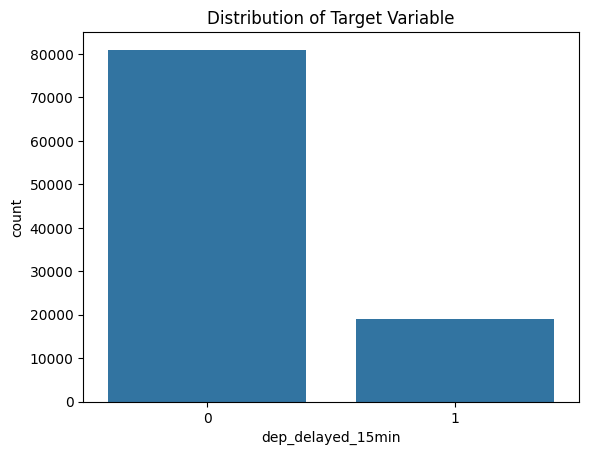

In [ ]:
# Count the frequency of Y/N (assuming Y/N is the value for dep_delayed_15min)
print(TrainDataset['dep_delayed_15min'].value_counts())

# Plot the distribution
sns.countplot(x='dep_delayed_15min', data=TrainDataset)
plt.title('Distribution of Target Variable')
plt.show()


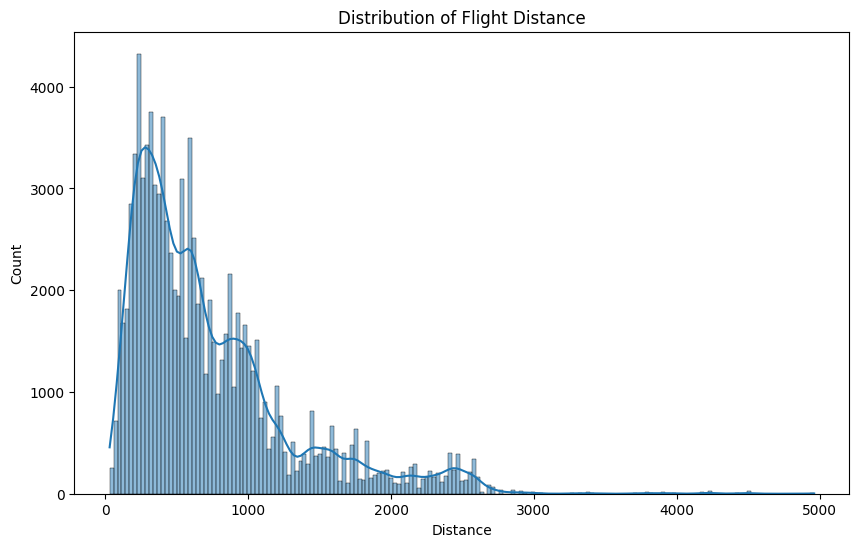

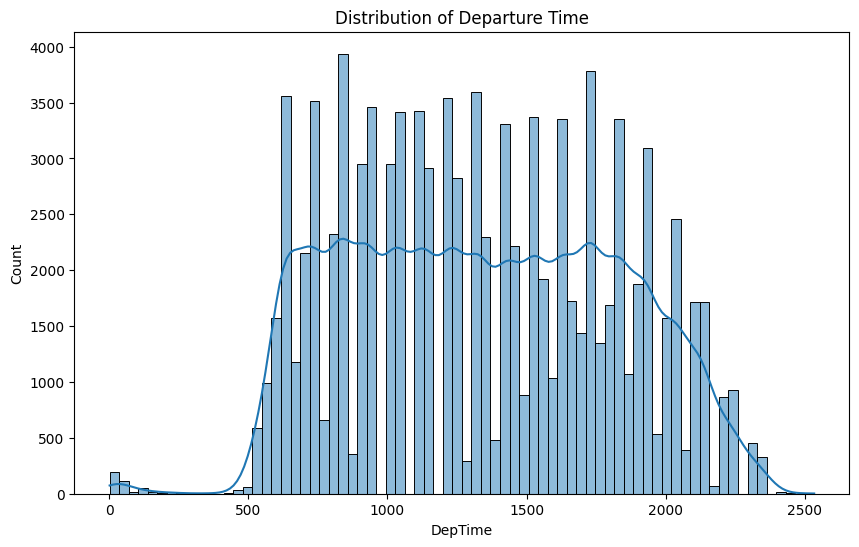

In [ ]:
# Visualizing distribution of Distance
plt.figure(figsize=(10, 6))
sns.histplot(TrainDataset['Distance'], kde=True)
plt.title('Distribution of Flight Distance')
plt.show()

# Visualizing distribution of DepTime
plt.figure(figsize=(10, 6))
sns.histplot(TrainDataset['DepTime'], kde=True)
plt.title('Distribution of Departure Time')
plt.show()


In [ ]:
# Average distance by origin and whether the flight was delayed
pivot_table = TrainDataset.pivot_table(values='Distance', index='Origin_encoded', columns='dep_delayed_15min', aggfunc='mean')
print(pivot_table)

# Grouping example: Average delay by UniqueCarrier
carrier_group = TrainDataset.groupby('airline_numeric')['dep_delayed_15min'].mean()
print(carrier_group)


dep_delayed_15min           0           1
Origin_encoded                           
0.027014           223.000000         NaN
0.030726           207.363636  216.000000
0.032680           620.074324  571.000000
0.034983           539.431818  146.000000
0.055047           131.500000         NaN
...                       ...         ...
0.302629           503.000000  503.000000
0.303644           143.000000  142.750000
0.303997           450.597701  441.421053
0.305277                  NaN  289.000000
0.338082           283.500000  283.500000

[263 rows x 2 columns]
airline_numeric
0     0.187938
1     0.167387
2     0.173869
3     0.172801
4     0.213433
5     0.167890
6     0.168922
7     0.175882
8     0.243474
9     0.192263
10    0.194545
11    0.181818
12    0.275318
13    0.161491
14    0.224624
15    0.155070
16    0.076923
17    0.143498
18    0.142235
19    0.213819
20    0.242185
21    0.043307
Name: dep_delayed_15min, dtype: float64


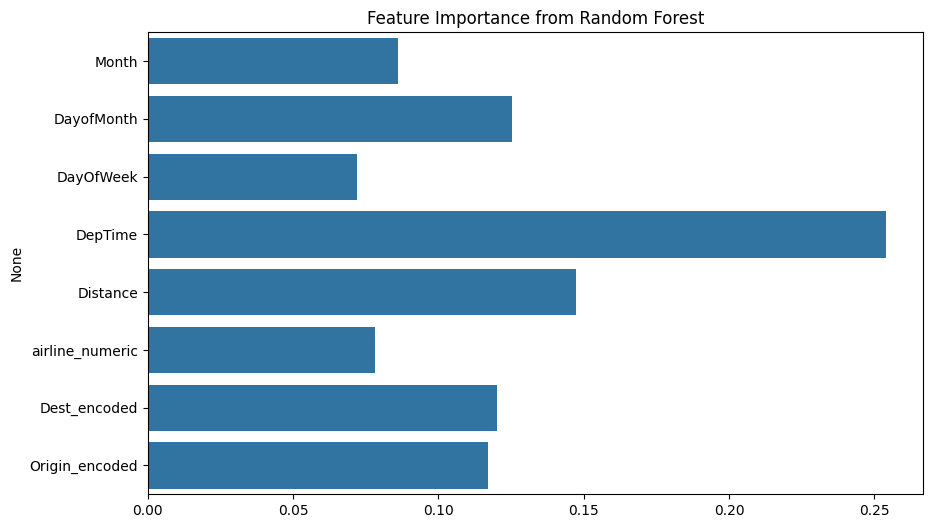

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have the target column 'dep_delayed_15min' encoded as 0 and 1
X = TrainDataset.drop(['dep_delayed_15min'], axis=1)  # Features
y = TrainDataset['dep_delayed_15min']  # Target

# Train a random forest to assess feature importance
rf = RandomForestClassifier()
rf.fit(X, y)

# Feature importance plot
importances = rf.feature_importances_
features = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()


# Data Processing and Results:

In [ ]:
# Assuming your target variable is 'dep_delayed_15min' (encoded as 0 for 'N' and 1 for 'Y')
X = TrainDataset.drop('dep_delayed_15min', axis=1)  # Features
y = TrainDataset['dep_delayed_15min']  # Target variable

# Scaling the numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Check the scaled dataset
print(X_scaled.head())

      Month  DayofMonth  DayOfWeek   DepTime  Distance  airline_numeric  \
0  0.428414    0.602254   1.530490  1.243715  0.004530        -1.274734   
1 -0.743428    0.488538  -0.477915  0.433431  0.182040        -1.083883   
2  0.721374   -1.558338   0.526288  0.168934 -0.545405        -0.893032   
3  1.307295    1.057115   1.028389 -0.685433  0.248172        -0.702181   
4  1.014335   -0.989761   1.028389  1.021202 -0.533223        -0.511330   

   Dest_encoded  Origin_encoded  
0     -1.003730        1.645386  
1     -0.160187       -0.467737  
2     -0.374603       -0.155022  
3     -1.050399        0.066352  
4      1.806956        1.473570  


In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the shapes of the datasets
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}')


Training set: (80000, 8), Validation set: (20000, 8)


In [ ]:
# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training set
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the validation set
y_val_pred_proba = rf_model.predict_proba(X_val)[:, 1]  # Get probability estimates for class 1 (Y)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
print(f'ROC AUC on Validation Set: {roc_auc}')


ROC AUC on Validation Set: 0.7402225304419966


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Assuming your data is preprocessed (encoded, scaled) as needed
# Split the training dataset into X (features) and y (target)
X = TrainDataset.drop(['dep_delayed_15min'], axis=1)  # Features
y = TrainDataset['dep_delayed_15min']  # Target (0 for 'N', 1 for 'Y')

# Split the dataset into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Preprocess features using scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Use the same scaler for validation data

# Step 3: Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Step 4: Initialize GridSearchCV with RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Step 5: Train the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Step 6: Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Step 7: Evaluate the best model on the validation set
y_val_pred_proba_best = best_rf_model.predict_proba(X_val_scaled)[:, 1]  # Predict probabilities for class 1 (delayed)
roc_auc_best = roc_auc_score(y_val, y_val_pred_proba_best)
print(f'Best ROC AUC on Validation Set: {roc_auc_best}')

# Step 8: Preprocess the Test Dataset (apply the same scaling as training)
# Assuming TestDataset is already loaded and preprocessed (encoded like TrainDataset)
TestDataset_scaled = scaler.transform(TestDataset)  # Scale the test dataset using the same scaler

# Step 9: Make predictions on the test data using the best model
test_predictions_proba = best_rf_model.predict_proba(TestDataset_scaled)[:, 1]  # Class 1 probabilities

# Step 10: Prepare the submission file
submission = pd.DataFrame({
    'id': TestDataset.index,  # Use the index as 'id' or replace with the 'id' column if available
    'dep_delayed_15min': test_predictions_proba  # Predicted probabilities for delay
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Check the first few rows of the submission file
print(submission.head())


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best ROC AUC on Validation Set: 0.7466520640459834


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [ ]:
# Step 1: Preprocess the Test Dataset (ensure the same columns as training data)
# Assuming TestDataset is already preprocessed (scaled, encoded) like TrainDataset

# The training dataset's columns used for training (excluding the target)
train_columns = X_train.columns  # This assumes 'X_train' has the columns used for training

# Reorder the test dataset columns to match the training set's columns
TestDataset = TestDataset[train_columns]  # Ensure the test dataset has the same columns in the same order

# Step 2: Make Predictions on the Test Data
# Use the best model to predict probabilities for the test set
test_predictions_proba = best_rf_model.predict_proba(TestDataset)[:, 1]  # Class 1 probabilities (for 'Y')

# Step 3: Prepare Submission File
# Assuming the test dataset has an 'id' column or use its index if 'id' is not available
submission = pd.DataFrame({
    'id': TestDataset.index,  # Replace with 'id' column if available
    'dep_delayed_15min': test_predictions_proba  # Predicted probabilities
})

# Save to CSV for submission
submission.to_csv('submission.csv', index=False)

# Optional: Check the first few rows of the submission
print(submission.head())



In [ ]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with Random Forest and parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_val_pred_proba_best = best_rf_model.predict_proba(X_val)[:, 1]
roc_auc_best = roc_auc_score(y_val, y_val_pred_proba_best)

print(f'Best ROC AUC on Validation Set: {roc_auc_best}')

# Step 1: Save the best model's parameters and ROC AUC to a CSV
best_params = grid_search.best_params_
results_df = pd.DataFrame([best_params])
results_df['Best_ROC_AUC'] = roc_auc_best

# Save to CSV file
results_df.to_csv('best_rf_model_grid_search_results.csv', index=False)

# Step 2: Optional - Save all grid search results to a CSV
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df.to_csv('all_rf_grid_search_results.csv', index=False)

# Optional: Print the best model's parameters and the saved CSV location
print("Best parameters saved to 'best_rf_model_grid_search_results.csv'.")
print("All grid search results saved to 'all_rf_grid_search_results.csv'.")


# Model Evaluation and Validation:

In [ ]:
# Confusion Matrix
y_val_pred = rf_model.predict(X_val)
cm = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', cm)

# Classification Report
print('Classification Report:\n', classification_report(y_val, y_val_pred))

In [ ]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')